In [1]:
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
import tensorflow as tf
print (tf.__version__)

2.20.0


In [3]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [4]:
print("x_train [ shape %s ] sample patch:\n" % (str(x_train.shape)), x_train[1, 15:20, 5:10])

x_train [ shape (60000, 28, 28) ] sample patch:
 [[  0  76 246 252 112]
 [  0  85 252 230  25]
 [  0  85 252 223   0]
 [  0  85 252 145   0]
 [  0  86 253 225   0]]


In [5]:
import matplotlib.pyplot as plt

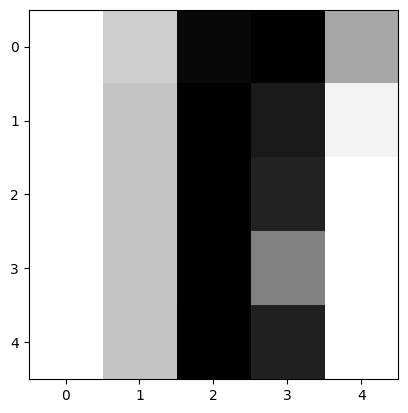

In [6]:
plt.imshow(x_train[1 , 15:20, 5:10], cmap='Greys')

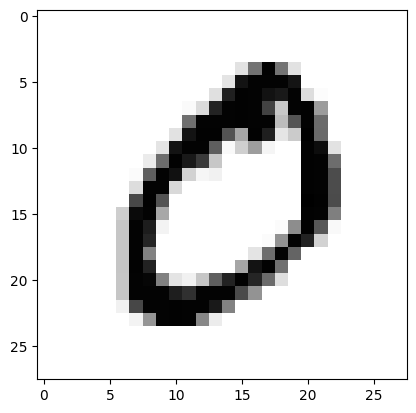

In [7]:
plt.imshow(x_train[1], cmap='Greys')

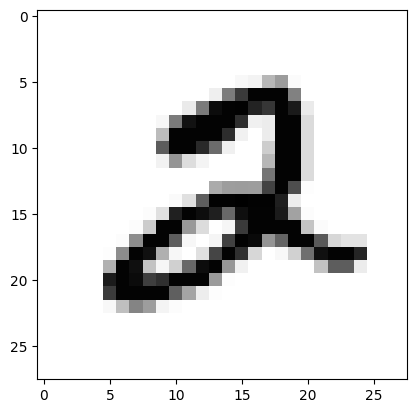

In [8]:
plt.imshow(x_train[5], cmap='Greys')

In [9]:
import tensorflow as tf

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [12]:
print("x_train [ shape %s ] sample patch:\n" % (str(x_train.shape)), x_train[1, 15:20, 5:10])

x_train [ shape (60000, 28, 28) ] sample patch:
 [[0.         0.29803923 0.9647059  0.9882353  0.4392157 ]
 [0.         0.33333334 0.9882353  0.9019608  0.09803922]
 [0.         0.33333334 0.9882353  0.8745098  0.        ]
 [0.         0.33333334 0.9882353  0.5686275  0.        ]
 [0.         0.3372549  0.99215686 0.88235295 0.        ]]


In [13]:
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1, 784)

In [14]:
y_train_oh = tf.keras.utils.to_categorical(y_train,10)
y_test_oh = tf.keras.utils.to_categorical(y_test,10)

In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [73]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 444,830 (1.70 MB)

 Trainable params: 444,830 (1.70 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model .compile(optimizer= tf .keras.optimizers.Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [75]:
history = model.fit(x_train, y_train_oh, epochs=10, validation_split=0.2, batch_size=64)
test_loss , test_acc = model.evaluate(x_test, y_test_oh)
print(f'Test accuracy:', {test_acc})

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9219 - loss: 0.2631 - val_accuracy: 0.9658 - val_loss: 0.1157
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9711 - loss: 0.0986 - val_accuracy: 0.9627 - val_loss: 0.1205
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9806 - loss: 0.0636 - val_accuracy: 0.9753 - val_loss: 0.0826
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9862 - loss: 0.0440 - val_accuracy: 0.9716 - val_loss: 0.0967
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9881 - loss: 0.0356 - val_accuracy: 0.9772 - val_loss: 0.0796
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9913 - loss: 0.0261 - val_accuracy: 0.9757 - val_loss: 0.0935
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9932 - loss: 0.0220 - val_accuracy: 0.9764 - val_loss: 0.0910
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9927 - loss: 0.0215 - val_accuracy: 0.

In [76]:
def get_randam_indices(total_image , num_images):
    return np.random.choice(total_image, num_images, replace=False)

In [77]:
predictions = model.predict(x_test)
x_test_images = x_test.reshape(-1,28,28)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_oh, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [78]:
num_images_tp_show = 5
rundom_indices = get_randam_indices(len(x_test_images), num_images_tp_show)

In [79]:
# This is a conceptual repair for the function in Cell In[38]
def plot_images(images, labels, predictions):
    # Set the figure size outside the loop
    plt.figure(figsize=(15, 5)) 
    
    # Determine the number of images to plot (which is len(images))
    num_images = len(images) 
    
    for i in range(num_images):
        # *** FIX IS HERE ***
        # Use plt.subplot (lowercase 's') and pass the 3 arguments
        plt.subplot(1, num_images, i + 1)
        
        # Plot the image
        plt.imshow(images[i], cmap='gray')
        
        # Set the title with the actual label and prediction
        plt.title(f"Label: {labels[i]} \n Pred: {predictions[i]}") 
        
        # Remove axes ticks for cleaner plot
        plt.axis('off') 
        
    plt.tight_layout() # Adjust layout to prevent overlap
    plt.show()

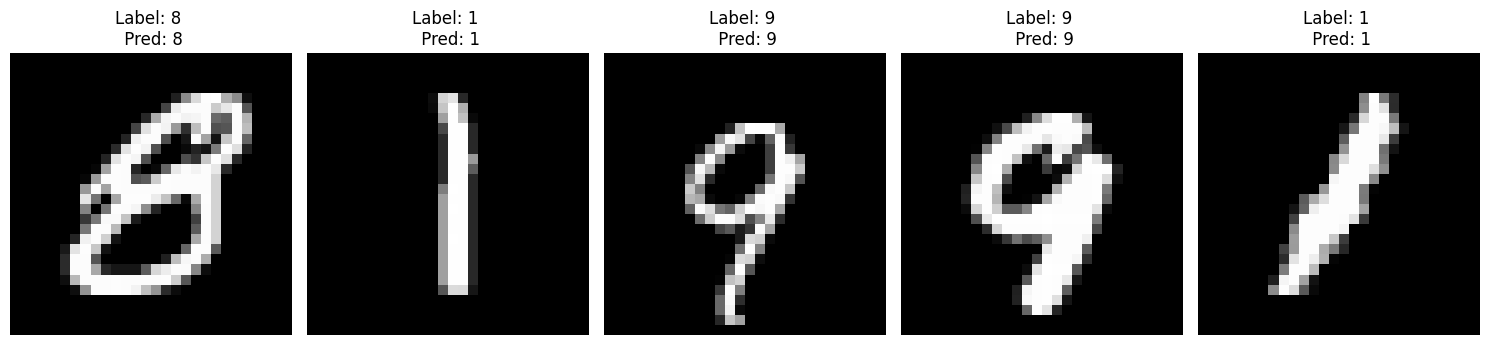

In [80]:
plot_images(x_test_images[rundom_indices], true_classes[rundom_indices], predicted_classes[rundom_indices])